In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
data = pd.read_csv("Student Placement.csv")

In [3]:
# Priniting first five rows
data.head()

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data.shape

(215, 14)

In [5]:
#to check the scatterness of the column data
data.describe() 

,Sno,10th %,12th %,Degree %,Mba %,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,77.890000,940000.000000


In [6]:
#allow to learn the shape of the object type of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno             215 non-null    int64  
 1   Gender          215 non-null    object 
 2   10th %          215 non-null    float64
 3   SSC Board       215 non-null    object 
 4   12th %          215 non-null    float64
 5   HSC Board       215 non-null    object 
 6   12th Stream     215 non-null    object 
 7   Degree %        215 non-null    float64
 8   Degree stream   215 non-null    object 
 9   Work exp        215 non-null    object 
 10  specialisation  215 non-null    object 
 11  Mba %           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [7]:
# To find out NaN Value
data.isnull().sum()

Sno                0
Gender             0
10th %             0
SSC Board          0
12th %             0
HSC Board          0
12th Stream        0
Degree %           0
Degree stream      0
Work exp           0
specialisation     0
Mba %              0
status             0
salary            67
dtype: int64

In [8]:
data['salary'].fillna(value=0 , inplace = True)

In [9]:
data.isnull().sum()

Sno               0
Gender            0
10th %            0
SSC Board         0
12th %            0
HSC Board         0
12th Stream       0
Degree %          0
Degree stream     0
Work exp          0
specialisation    0
Mba %             0
status            0
salary            0
dtype: int64

In [10]:
# Dropping not required column
data.drop(['Sno','SSC Board','HSC Board'], axis = 1 , inplace = True)

In [11]:
data.head()

,Gender,10th %,12th %,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          215 non-null    object 
 1   10th %          215 non-null    float64
 2   12th %          215 non-null    float64
 3   12th Stream     215 non-null    object 
 4   Degree %        215 non-null    float64
 5   Degree stream   215 non-null    object 
 6   Work exp        215 non-null    object 
 7   specialisation  215 non-null    object 
 8   Mba %           215 non-null    float64
 9   status          215 non-null    object 
 10  salary          215 non-null    float64
dtypes: float64(5), object(6)
memory usage: 18.6+ KB


Text(0.5, 1.0, 'Degree Percentage')

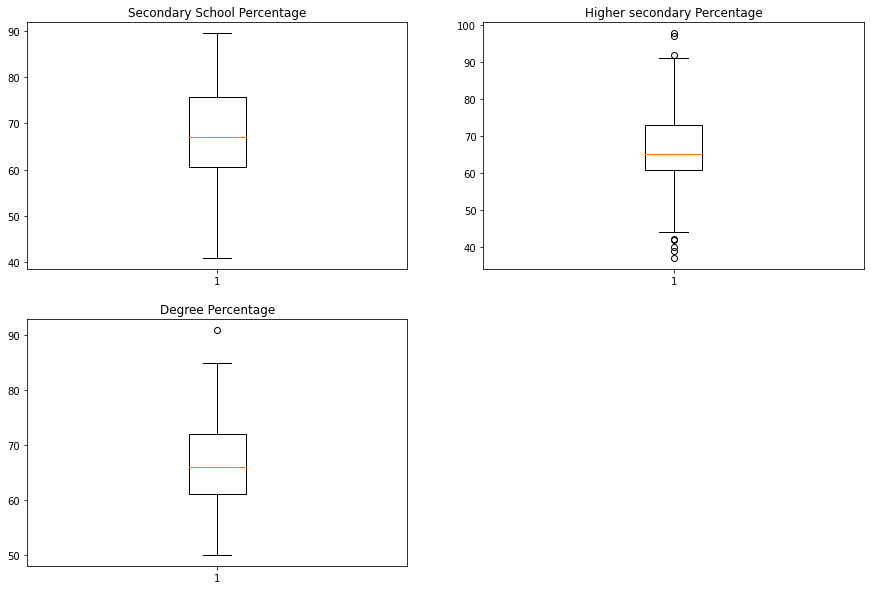

In [13]:
# Checking for outlier
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(data['10th %'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(data['12th %'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(data['Degree %'])
ax.set_title('Degree Percentage')



{'whiskers': [<matplotlib.lines.Line2D at 0x293560f99d0>,
 'caps': [<matplotlib.lines.Line2D at 0x293560f9e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x293560f96d0>],
 'medians': [<matplotlib.lines.Line2D at 0x29356109430>],
 'fliers': [<matplotlib.lines.Line2D at 0x29356109700>],
 'means': []}

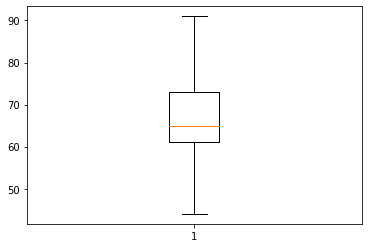

In [14]:
Q1 = data['12th %'].quantile(0.25)
Q3 = data['12th %'].quantile(0.75)
IQR = Q3 - Q1

filter = (data['12th %'] >= Q1 - 1.5 * IQR) & (data['12th %']<= Q3+ 1.5*IQR)
placement= data.loc[filter]
plt.boxplot(placement['12th %'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29356160bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2935616d190>,
 'boxes': [<matplotlib.lines.Line2D at 0x293561608e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2935616d730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2935616da00>],
 'means': []}

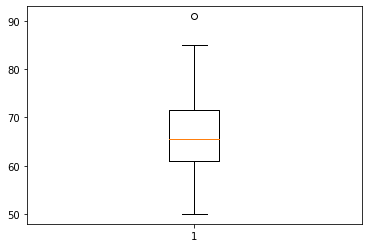

In [15]:
Q1 = data['Degree %'].quantile(0.25)
Q3 = data['Degree %'].quantile(0.75)
IQR = Q3 - Q1

filter = (data['Degree %'] >= Q1 - 1.5 * IQR) & (data['12th %']<= Q3+ 1.5*IQR)
placement= data.loc[filter]
plt.boxplot(placement['Degree %'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

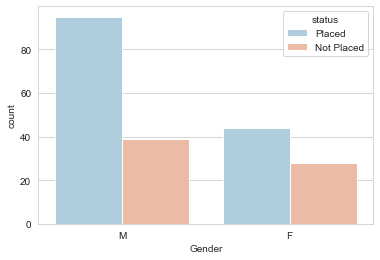

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=placement,palette='RdBu_r',hue='status')

<AxesSubplot:xlabel='specialisation', ylabel='count'>

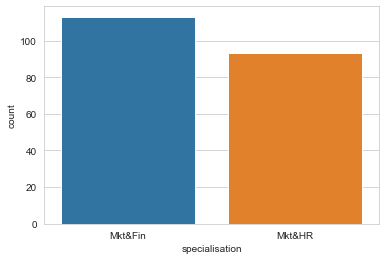

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='specialisation',data=placement)

C:\Users\Susma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

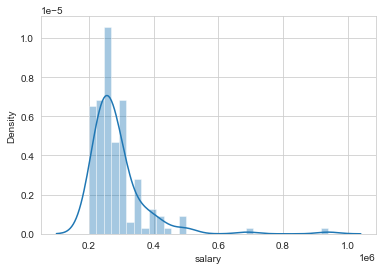

In [18]:
placement_placed = placement[placement.salary!= 0]
sns.distplot(placement_placed['salary'])

In [19]:
placement.corr()

,10th %,12th %,Degree %,Mba %,salary
10th %,1.000000,0.484201,0.522509,0.360332,0.536001
12th %,0.484201,1.000000,0.401880,0.292315,0.427711
Degree %,0.522509,0.401880,1.000000,0.352200,0.391441
Mba %,0.360332,0.292315,0.352200,1.000000,0.097605
salary,0.536001,0.427711,0.391441,0.097605,1.000000


<AxesSubplot:>

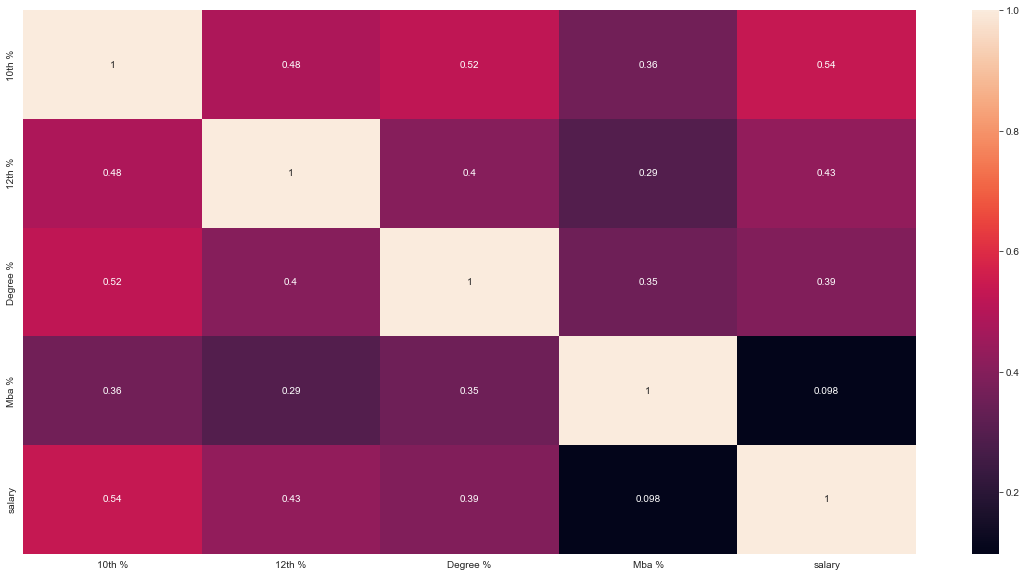

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(placement.corr().abs(), annot=True)

In [21]:
placement.shape

(206, 11)

In [22]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in (0,5,6,7,9):
    placement.iloc[:,i] = enc.fit_transform(placement.iloc[:,i])
placement.head(10)

C:\Users\Susma\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Gender,10th %,12th %,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
1,1,79.33,78.33,Science,77.48,2,1,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,0,0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,2,0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,0,0,0,55.50,1,425000.0
5,1,55.00,49.80,Science,67.25,2,1,0,51.58,0,0.0
6,0,46.00,49.20,Commerce,79.00,0,0,0,53.29,0,0.0
7,1,82.00,64.00,Science,66.00,2,1,0,62.14,1,252000.0
8,1,73.00,79.00,Commerce,72.00,0,0,0,61.29,1,231000.0
9,1,58.00,70.00,Commerce,61.00,0,0,0,52.21,0,0.0
10,1,58.00,61.00,Commerce,60.00,0,1,1,60.85,1,260000.0


In [23]:
# One hot encoding

dummy_12th_Stream = pd.get_dummies(placement['12th Stream'], prefix = 'dummy')
dummy_Degree_stream = pd.get_dummies(placement['Degree stream'], prefix = 'dummy')

place = pd.concat([placement , dummy_12th_Stream , dummy_Degree_stream],axis = 1)
place.drop(['12th Stream','salary'],axis = 1 , inplace = True)
place.head()

,Gender,10th %,12th %,Degree %,Degree stream,Work exp,specialisation,Mba %,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_0,dummy_1,dummy_2
1,1,79.33,78.33,77.48,2,1,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,2,0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,0,0,55.50,1,0,1,0,1,0,0
5,1,55.00,49.80,67.25,2,1,0,51.58,0,0,0,1,0,0,1


In [24]:
# Splitting Data

# Here we have selected only the important columns
y = place.status

X = place.iloc[:,[0,1,2,3,4,5,6,7]] 
X.head()


,Gender,10th %,12th %,Degree %,Degree stream,Work exp,specialisation,Mba %
1,1,79.33,78.33,77.48,2,1,0,66.28
2,1,65.00,68.00,64.00,0,0,0,57.80
3,1,56.00,52.00,52.00,2,0,1,59.43
4,1,85.80,73.60,73.30,0,0,0,55.50
5,1,55.00,49.80,67.25,2,1,0,51.58


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8 , random_state = 1)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train.shape

(164, 8)

In [28]:
X_test.shape

(42, 8)

In [30]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [31]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [32]:
# Finding accuracy, precision, recall and confusion matrix

print(classification_report(y_test,y_predict_log))
print("Accuracy Score : ",accuracy_score(y_test,y_predict_log))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.89      0.92      0.91        26

    accuracy                           0.88        42
   macro avg       0.88      0.87      0.87        42
weighted avg       0.88      0.88      0.88        42

Accuracy Score :  0.8809523809523809


In [33]:
confusion_matrix(y_test,y_predict_log)

array([[13,  3],
       [ 2, 24]], dtype=int64)

In [34]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
model_dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)

model_dt.fit(X_train , y_train)
y_pred_dt = model_dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))
print("Accuracy", metrics.accuracy_score(y_test , y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.44      0.56        16
           1       0.73      0.92      0.81        26

    accuracy                           0.74        42
   macro avg       0.75      0.68      0.69        42
weighted avg       0.75      0.74      0.72        42

Accuracy 0.7380952380952381


In [37]:
confusion_matrix(y_test,y_pred_dt)

array([[ 7,  9],
       [ 2, 24]], dtype=int64)

In [38]:
# Save the model

import pickle
# Open a file, where we want to store the data
file = open('log_reg.pkl','wb')

# dump information into the file
pickle.dump(model_logr,file)

In [41]:
# Save the model

import pickle
# Open a file, where we want to store the data
file = open('dt.pkl','wb')

# dump information into the file
pickle.dump(model_dt,file)